## Importing Libraries

In [26]:
# Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Importing Data Set

In [29]:
dataset = pd.read_csv('dataset/clean-sleep-efficiency.csv')
dataset.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


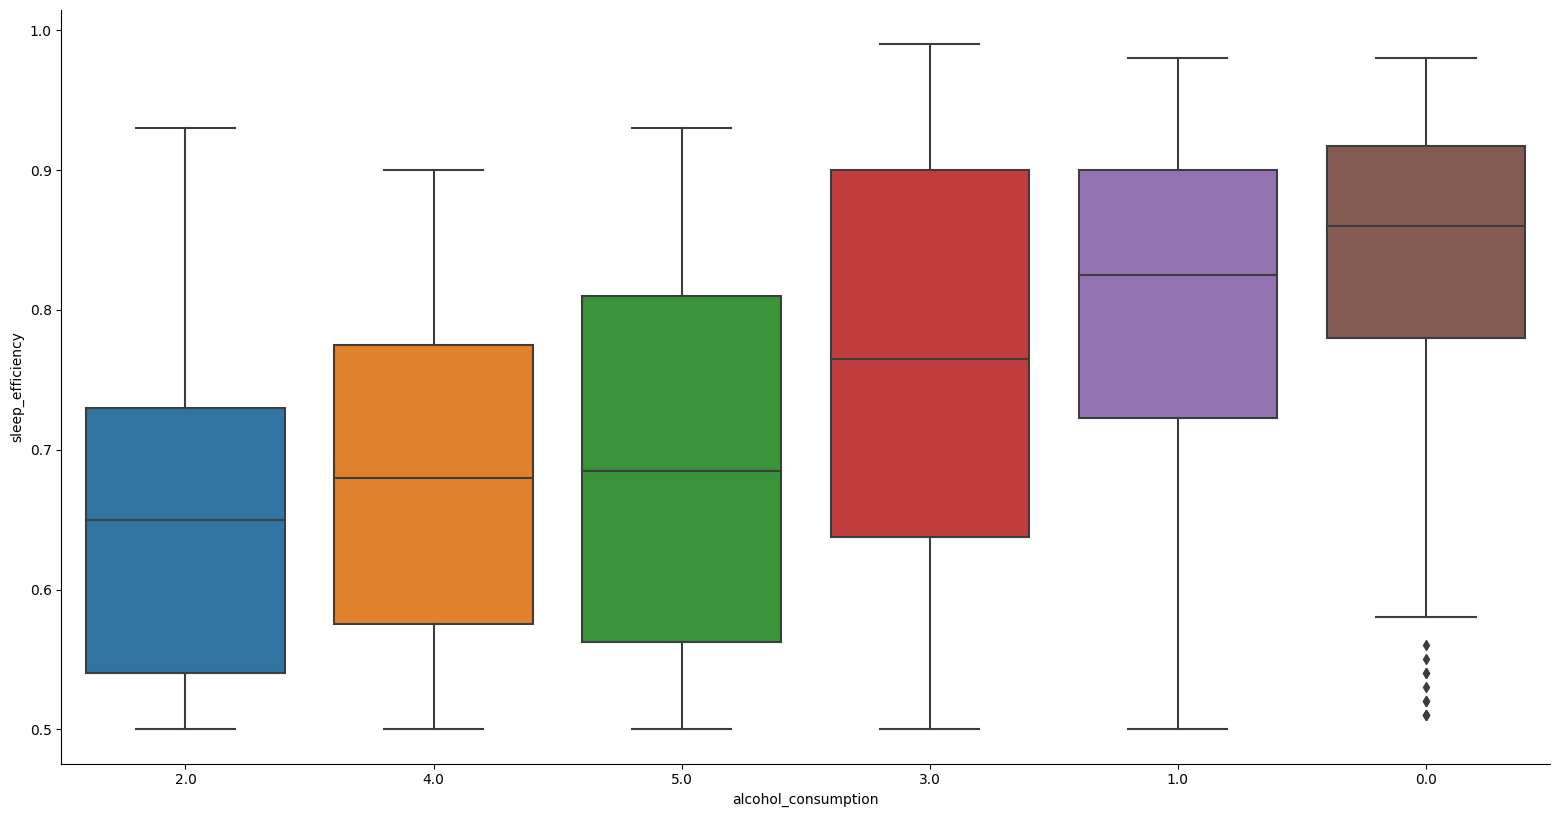

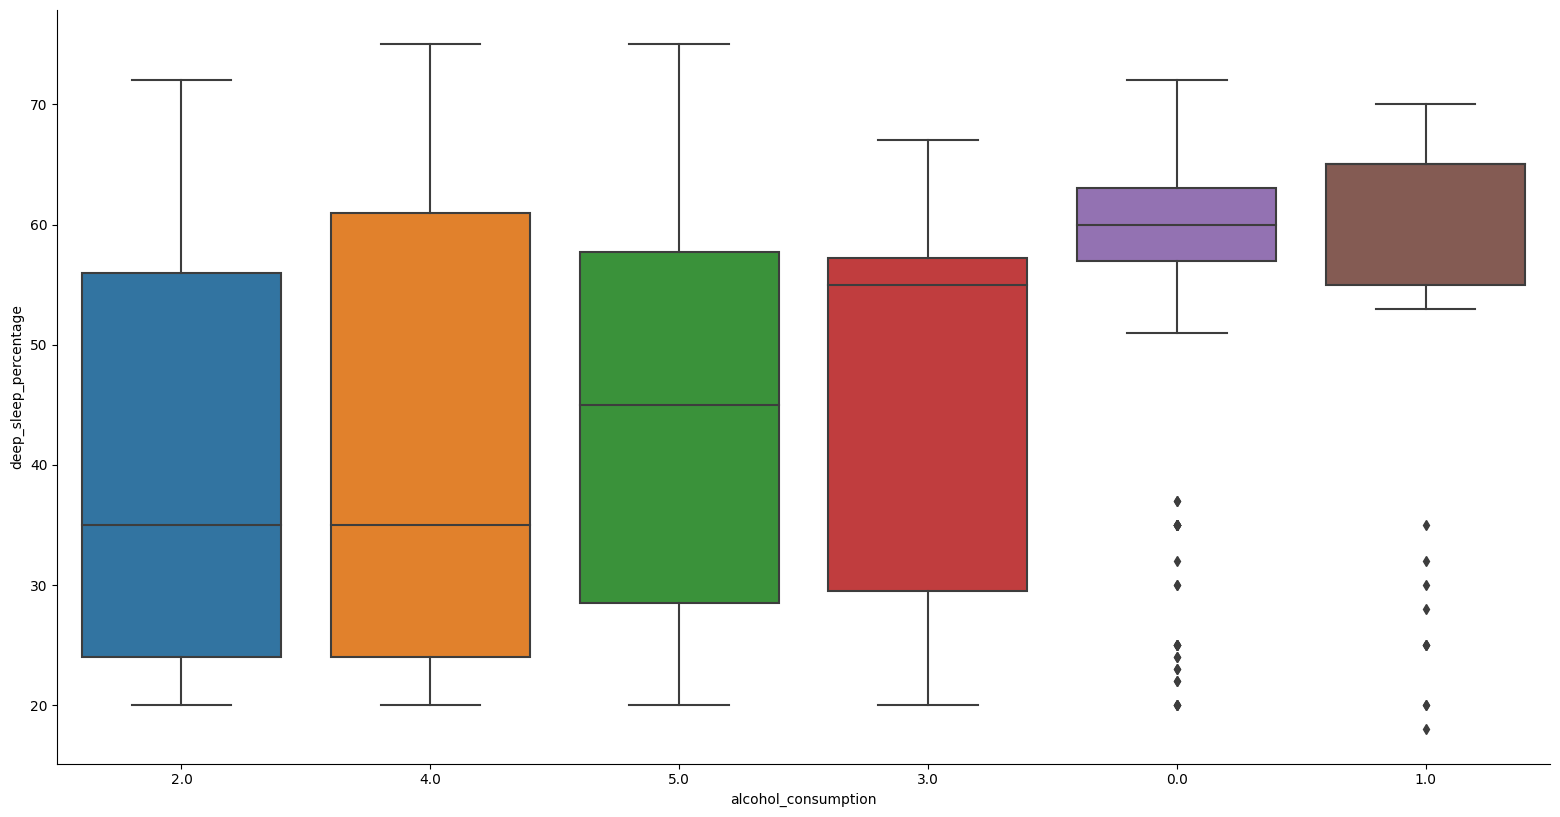

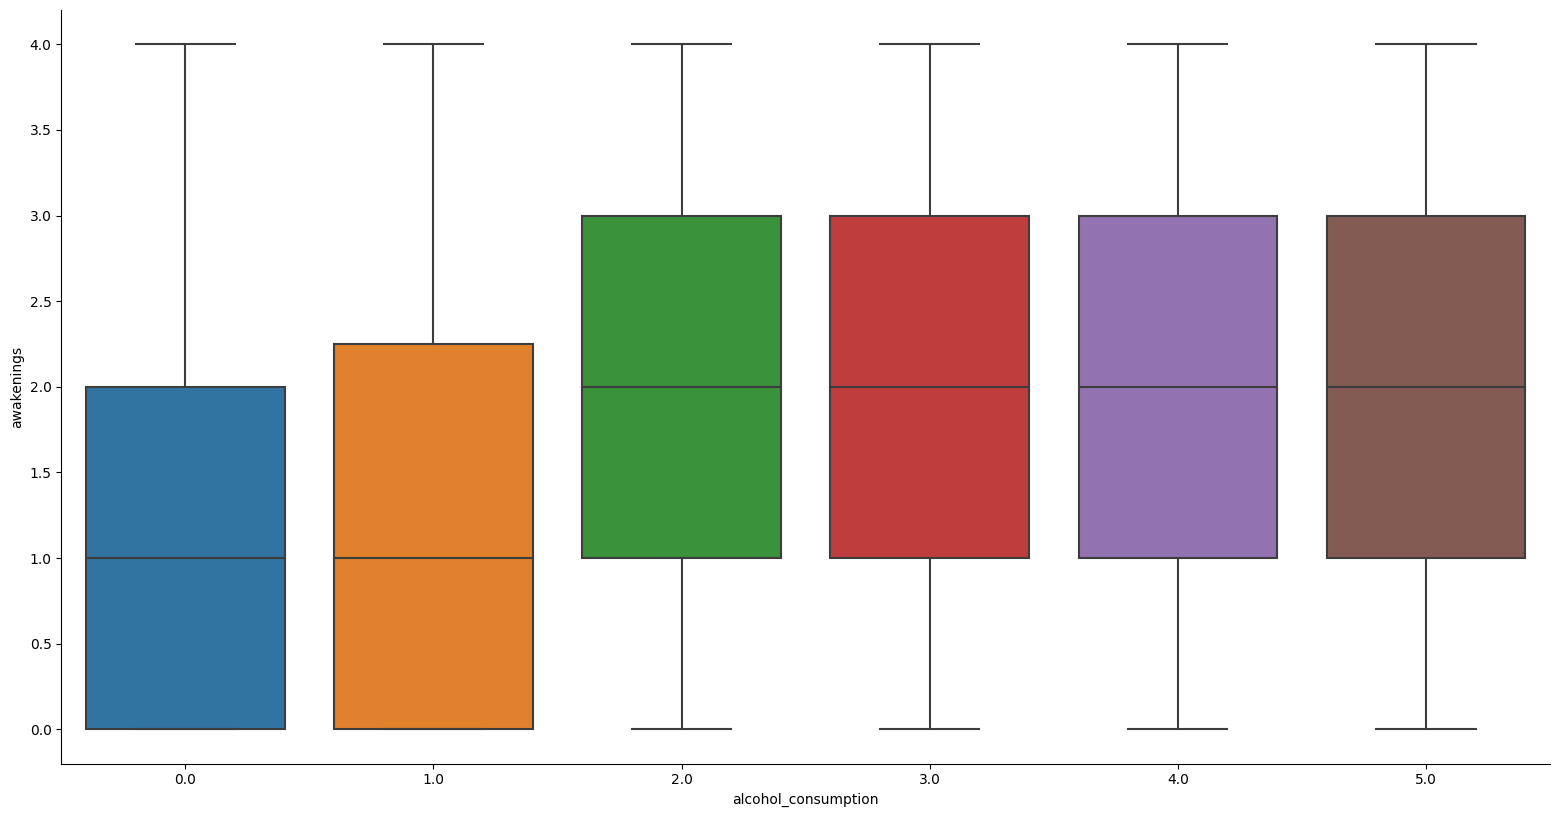

In [ ]:
alcohol = dataset.filter(['sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in alcohol:
    if var != 'alcohol_consumption':
        tmp=alcohol.filter(['alcohol_consumption',var])
        sb.catplot(data=tmp, x='alcohol_consumption', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('alcohol_consumption')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. Generally, sleep efficiency is maximised when alcohol consumption is minimised.

2. Generally, deep sleep percentage increases with lower alcohol consumption. However, there are many outliers for alcohol consumption of 1.0 and 0 oz.

3. Generally, number of awakenings increases with increased alcohol consumption.

Overall, alcohol does affect sleep quality when consumed in excess. Ideally, sleep quality is maximised when no alcohol is consumed.

### Does Smoking affect Sleep Quality?

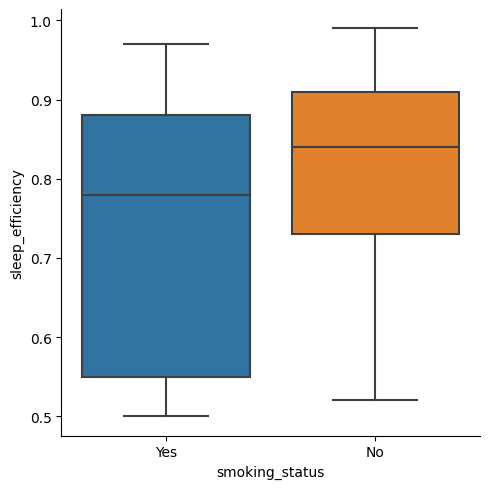

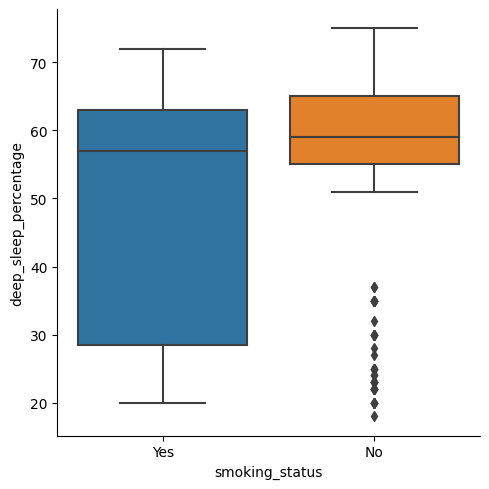

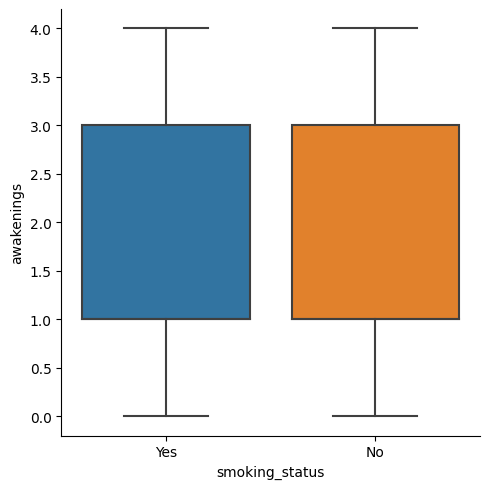

In [ ]:
smoking = dataset.filter(['smoking_status', 'sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in smoking:
    if var != 'smoking_status':
        tmp=smoking.filter(['smoking_status',var])
        sb.catplot(data=tmp, x='smoking_status', y=var, kind='box')

From the box plots above, we can deduce the following:

1. Generally, smokers have lower sleep efficiency as compared to non-smokers.

2. Generally, smokers have a slightly lower deep sleep percentage as compared to non-smokers. However, there are many outliers that have low deep sleep percentage for non-smokers.

3. There is no relation between smoking status and number of awakenings.

From the analysis, we can observe that smoking decreases sleep efficiency but may not have a very strong impact of deep sleep percentage and has no effect on number of awakenings. Therefore, smoking is a factor that affects sleep quality although not as strong.

## Principal Component Analysis (PCA)
In this portion, we will use PCA which is a technique for reducing the dimensionality of a dataset by identifying the most important underlying patterns or features. We apply PCA to the existing variables (sleep efficiency, deep sleep percentage, REM sleep percentage, number of awakenings) to identify the principal components that explain the most variance in the data. Based on the the contribution of each variable to the principal components, we can assign weights to each of the existing variables.

1. Data Preparation: 
Collect data on the different factors that contribute to sleep quality, such as sleep efficiency, deep sleep percentage, REM sleep percentage, and number of awakenings. The data should be in a numerical format and should be normalized so that each variable has a mean of 0 and a standard deviation of 1.

2. Perform PCA: 
Apply PCA to the normalized data to identify the principal components that explain the most variance in the data. The number of principal components to keep should be determined by examining the explained variance ratio or scree plot, and selecting the number of components that capture a sufficient amount of variance in the data.

3. Interpret Principal Components: 
Examine the loadings of each variable on the principal components to understand which variables contribute the most to each component. The loadings represent the correlation between each variable and the principal component, and can be positive or negative. Variables with high absolute loadings are most strongly associated with the principal component.

4. Calculate Weights: 
Once the principal components and variable loadings are identified, the weights for each variable can be calculated based on their contribution to the principal components. For example, the weight for sleep efficiency could be based on its loading on the first principal component, while the weight for deep sleep percentage could be based on its loading on the second principal component.

5. Calculate Sleep Quality Score: 
Finally, the sleep quality score can be calculated as a weighted sum of the different variables using the weights identified in step 4. For example, the sleep quality score could be calculated as:

Sleep Quality Score = w1 * Sleep Efficiency + w2 * Deep Sleep Percentage + w3 * REM Sleep Percentage - w4 * Number of Awakenings

where w1, w2, w3, and w4 are the weights calculated based on the PCA analysis.

It's important to note that PCA is just one approach to identifying weights for the different variables. The weights identified using PCA may not be optimal for all datasets or contexts, so it's important to carefully evaluate the results and consider other approaches as well.


### Import Libraries for PCA

In [ ]:
#import libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Fill in missing values for awakenings

In [ ]:
#Fill in missing values for awakenings
mean_awakenings = dataset['awakenings'].mean()
dataset['awakenings'].fillna(value=mean_awakenings, inplace=True)
ds_filled = dataset.fillna(value=mean_awakenings)

### Standardize the data

In [ ]:
sleep_quality_vars = ds_filled.filter(['sleep_efficiency', 'light_sleep_percentage', 'deep_sleep_percentage', 'rem_sleep_percentage','awakenings'])

# Normalize the data using the StandardScaler
scaler = StandardScaler() 
sleep_scaled = scaler.fit_transform(sleep_quality_vars)

print(sleep_scaled)

[[ 0.67426034 -0.82121854  1.09849019 -1.31032529 -1.23876602]
 [-0.95431503  1.8590953  -1.58746264 -1.02640054  1.02560741]
 [ 0.74828649 -0.95196556  1.09849019 -0.74247579 -0.48397487]
 ...
 [-1.76860272  1.53222776 -1.33165761 -0.74247579 -0.48397487]
 [-0.2140535  -0.95196556  1.22639271 -1.31032529  1.02560741]
 [-1.17639349  1.98984231 -1.90721893 -0.17462629 -0.48397487]]


### Create a PCA Object with all components and fit the PCA model to the scaled data

In [ ]:
# Apply PCA to the normalized data
pca = PCA()
sleep_pca = pca.fit_transform(sleep_scaled)

# Examine explained variance ratio to determine number of principal components to keep
print(pca.explained_variance_ratio_)

[5.91054096e-01 2.14346972e-01 1.62437452e-01 3.21614797e-02
 2.36798868e-32]


### Creating Sleep Quality based on weightage derived from PCA Explained Variance Ratio

In [ ]:
#Create sleep quality based on the PCA components and the weights
weights = [5.91054096e-01, 2.14346972e-01, 1.62437452e-01, 3.21614797e-02, 2.36798868e-32]
sleep_quality = (sleep_pca[:,0] * weights[0]) + (sleep_pca[:,1] * weights[1]) + (sleep_pca[:,2] * weights[2]) + (sleep_pca[:,3] * weights[3])
ds_filled['sleep_quality'] = sleep_quality
ds_filled.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency,sleep_quality
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,-1.038628
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,1.705723
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,-0.876008
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,2.028781
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,0.192627


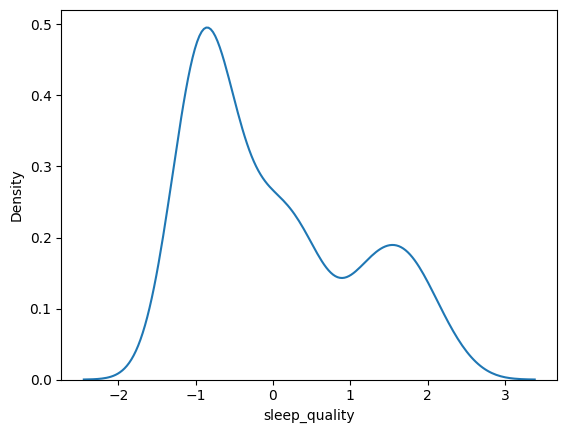

In [ ]:
sb.kdeplot(ds_filled['sleep_quality'])
plt.show()

## Creating Machine Learning Model
### Objective: Based on this model, we can predict a person's sleep quality based on his lifestyle choices

## Checkpoint 3. Methodology
Explain the reason for choosing your machine learning model.
Detailed & formal introduction to your model. You must provide the formulation or diagram of the model you use thoroughly. 
Clarify how you train and inference based on the model you choose.
Clarify the choice of hyperparameters of your model.


## Univariate Linear Regression

### Importing Libraries

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Fill up missing data
### Encode catergorical variables as numerical variables

In [ ]:
#Fill up missing data
mean_caffeine = ds_filled['caffeine_consumption'].mean()
ds_filled['caffeine_consumption'].fillna(value=mean_caffeine, inplace=True)

mean_alcohol = ds_filled['alcohol_consumption'].mean()
ds_filled['alcohol_consumption'].fillna(value=mean_alcohol, inplace=True)

mean_exercise = ds_filled['exercise_frequency'].mean()
ds_filled['exercise_frequency'].fillna(value=mean_exercise, inplace=True)

#Encode categorical variables bedtime as numerical variables
ds_filled['bed_time_edited'] = ds_filled['bed_time'].apply(lambda x: datetime.strptime(x, '%H:%M').hour)
encoder = OrdinalEncoder(categories=[range(0, 24)])
ds_filled['bed_time_encoded'] = encoder.fit_transform(ds_filled[['bed_time_edited']])

#Encode categorical variables wakeuptime as numerical variables
ds_filled['wakeup_time_edited'] = ds_filled['wakeup_time'].apply(lambda x: datetime.strptime(x, '%H:%M').hour)
encoder = OrdinalEncoder(categories=[range(0, 24)])
ds_filled['wakeup_time_encoded'] = encoder.fit_transform(ds_filled[['wakeup_time_edited']])

#Change smoking status from Yes or No to 1 or 0
ds_filled['smoking']=ds_filled['smoking_status'].apply(lambda x:1 if x=='Yes' else 0)
ds_filled.head()

#Change gender to one and 0
ds_filled['gender_type']=ds_filled['gender'].apply(lambda x:1 if x=='Male' else 0)
ds_filled.head()



,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,...,alcohol_consumption,smoking_status,exercise_frequency,sleep_quality,bed_time_edited,bed_time_encoded,wakeup_time_edited,wakeup_time_encoded,smoking,gender_type
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,...,0.0,Yes,3.0,-1.038628,1,1.0,7,7.0,1,0
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,...,3.0,Yes,3.0,1.705723,2,2.0,9,9.0,1,1
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,...,0.0,No,3.0,-0.876008,21,21.0,5,5.0,0,0
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,...,5.0,Yes,1.0,2.028781,2,2.0,8,8.0,1,0
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,...,3.0,No,3.0,0.192627,1,1.0,9,9.0,0,1


### Plotting Individual Univariate Regression Plots

In [ ]:
# Function for regression plotting
def regression_plot(predictor, response):
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.20, random_state=0)

    # Linear Regression using Train Data
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict response values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(y_train, y_train_pred)
    plt.plot(y_train, y_train, 'r-', linewidth = 3)

Intercept of Regression 	: b =  [0.22656097]
Coefficients of Regression 	: a =  [[-0.00542593]]



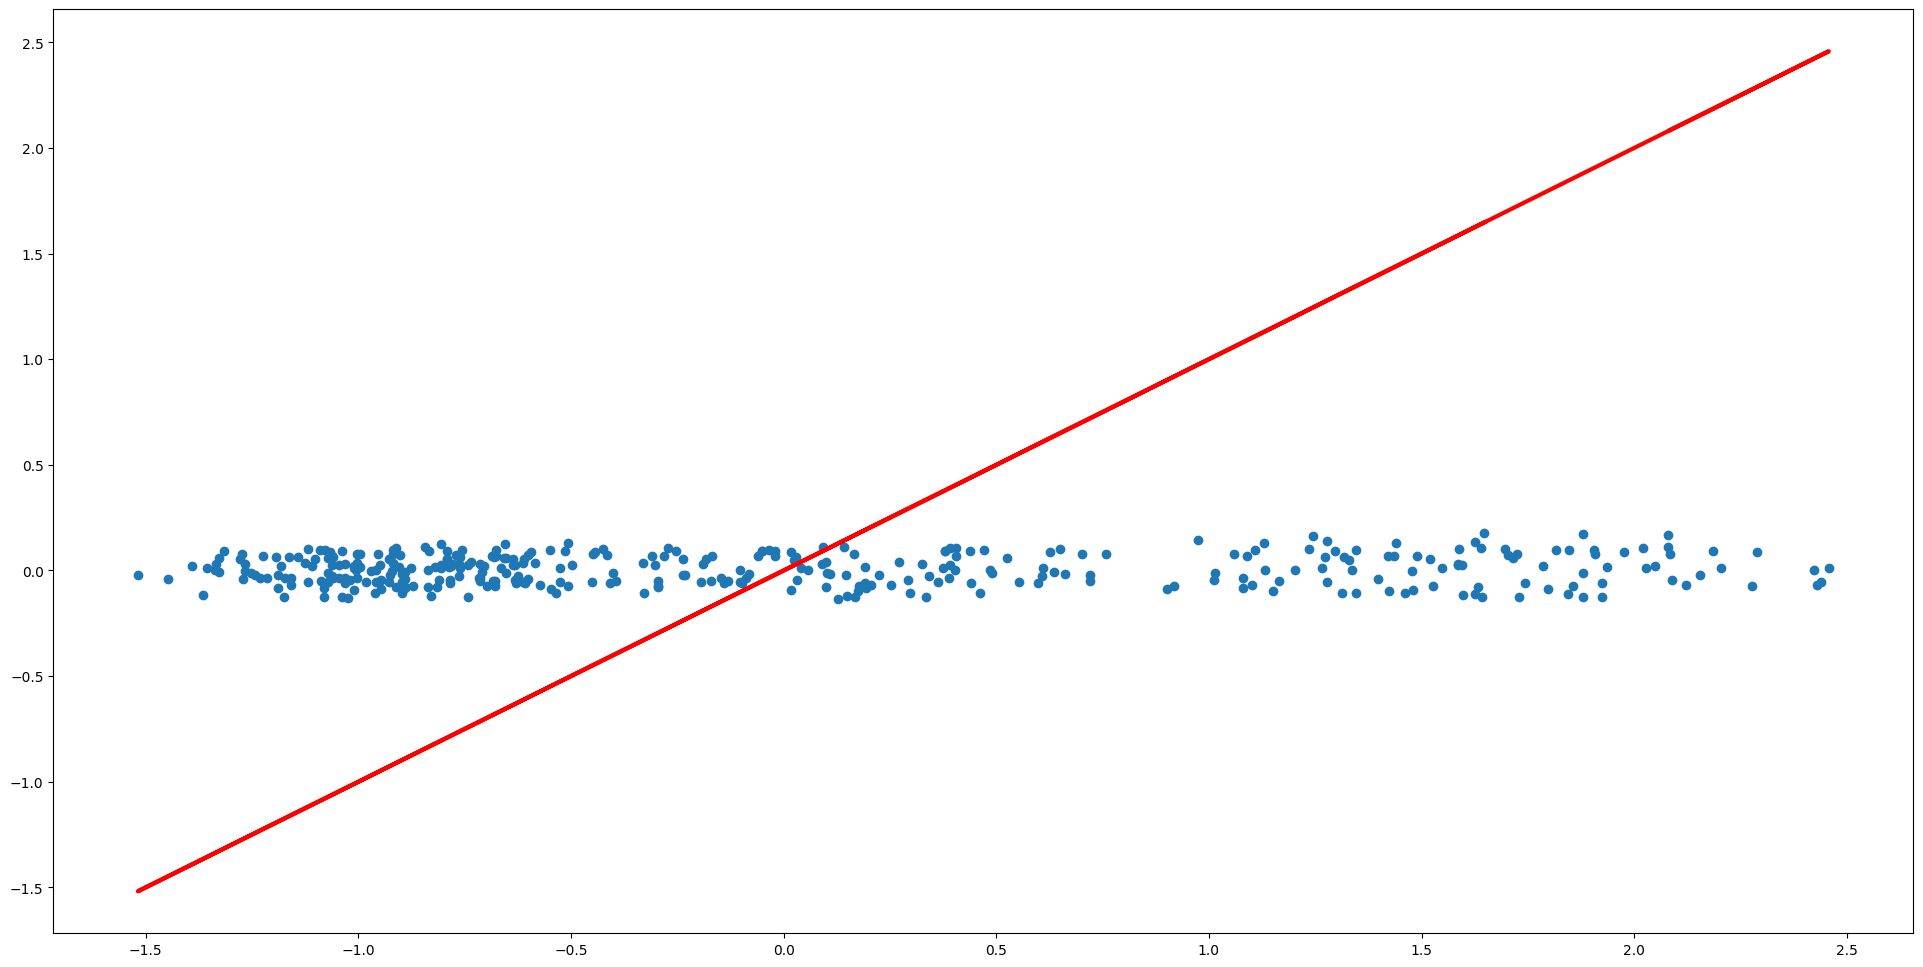

In [ ]:
sleep_quality = pd.DataFrame(ds_filled['sleep_quality']) 
age = pd.DataFrame(ds_filled['age']) 
regression_plot(age, sleep_quality)

Intercept of Regression 	: b =  [-0.02704389]
Coefficients of Regression 	: a =  [[0.06559722]]



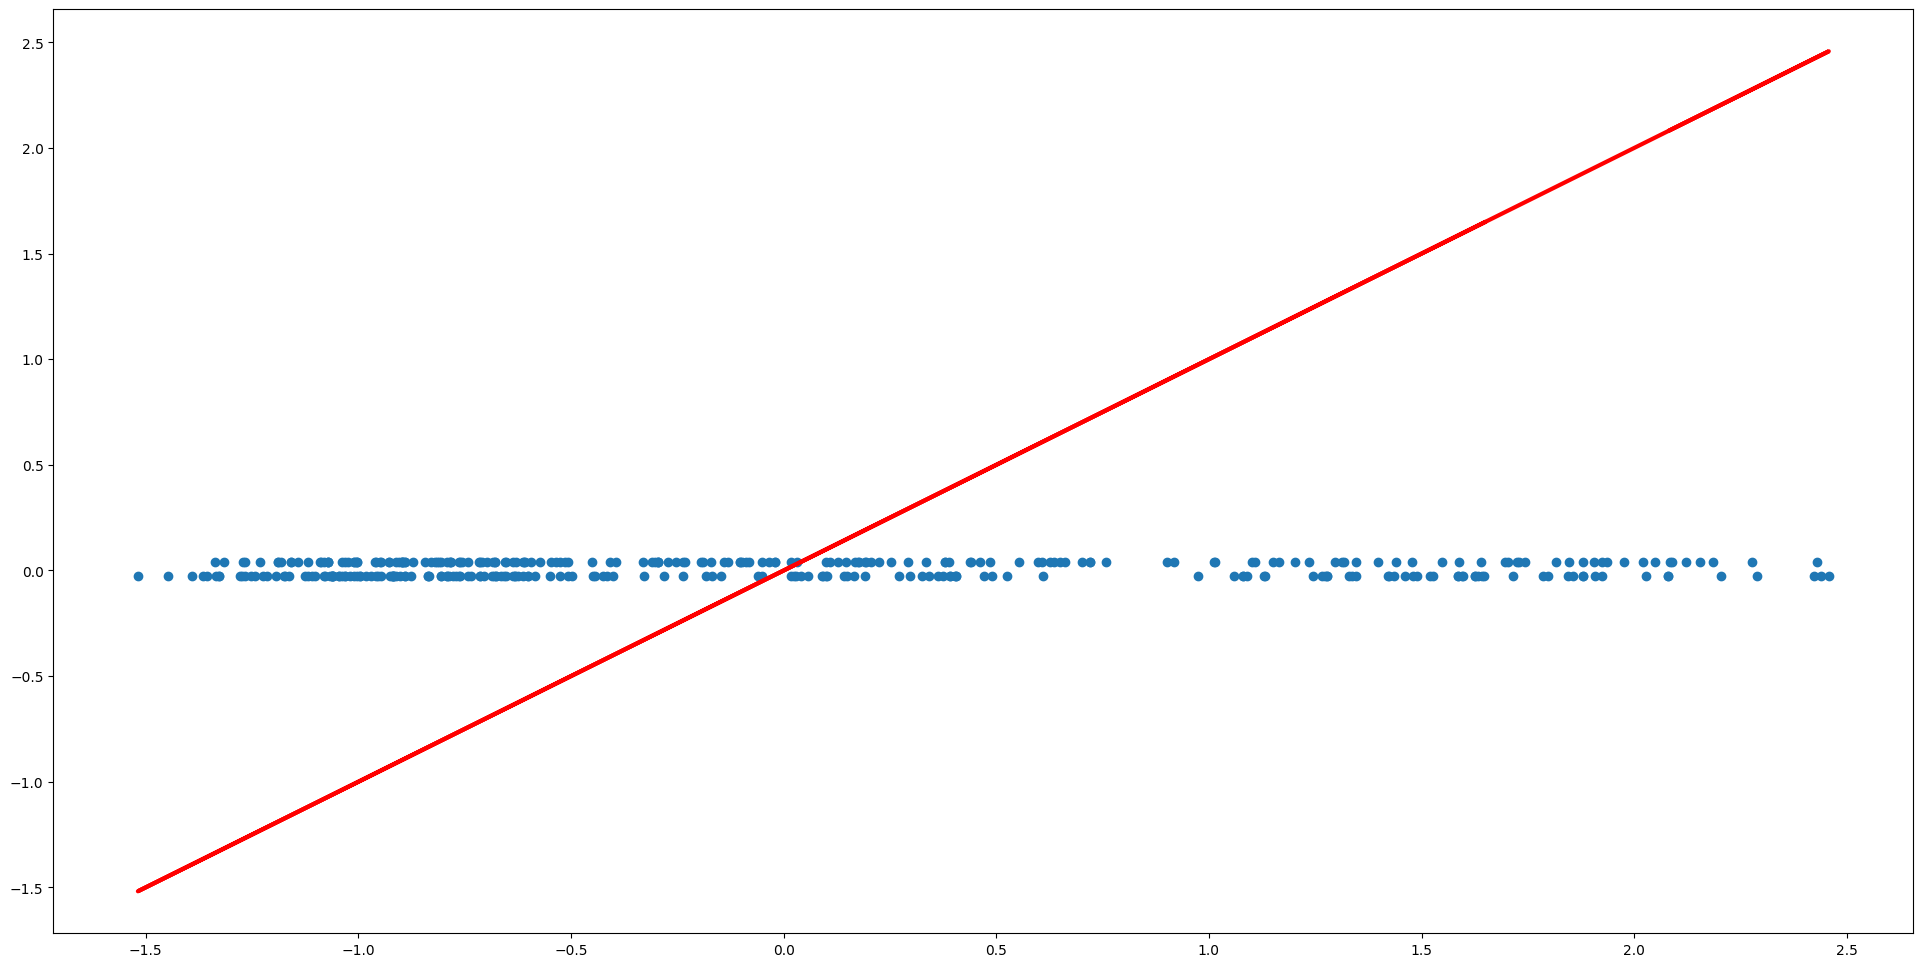

In [ ]:
gender = pd.DataFrame(ds_filled['gender_type']) 
regression_plot(gender, sleep_quality)

Intercept of Regression 	: b =  [-0.61149156]
Coefficients of Regression 	: a =  [[0.08878067]]



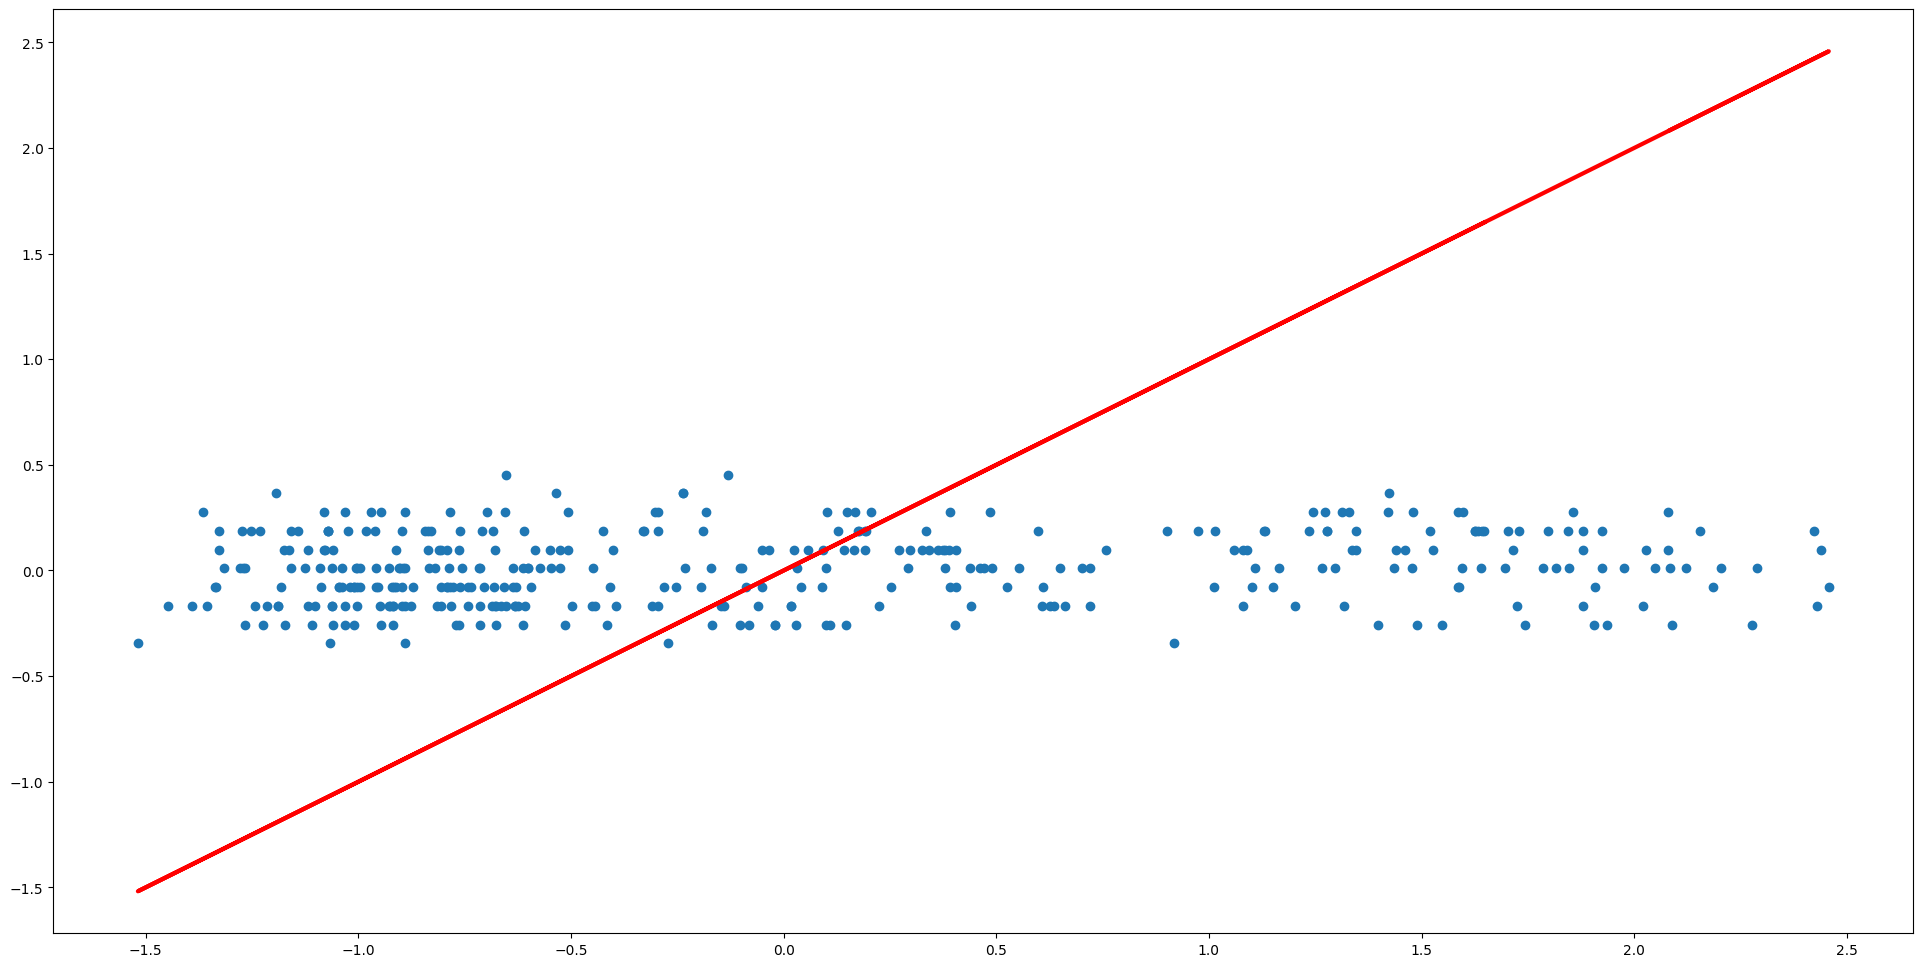

In [ ]:
wakeup_time = pd.DataFrame(ds_filled['wakeup_time_encoded']) 
regression_plot(wakeup_time, sleep_quality)

Intercept of Regression 	: b =  [0.17613671]
Coefficients of Regression 	: a =  [[-0.01625083]]



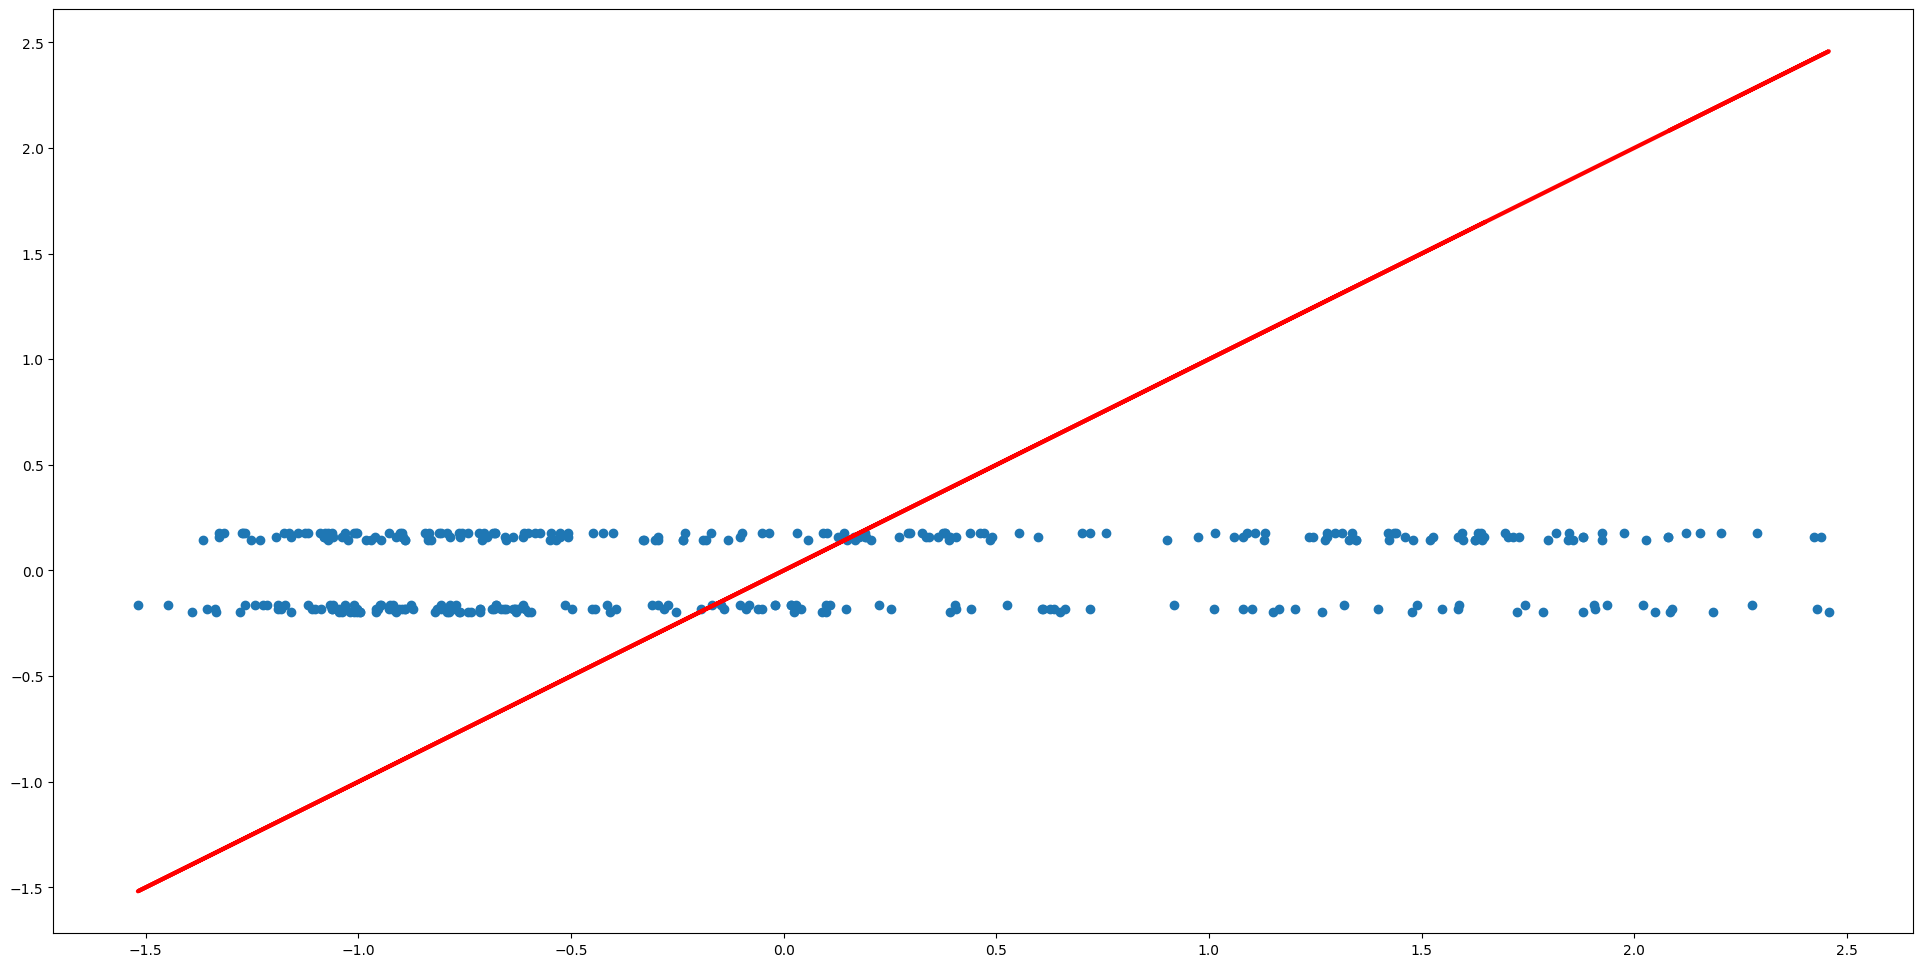

In [ ]:
bed_time = pd.DataFrame(ds_filled['bed_time_encoded']) 
regression_plot(bed_time, sleep_quality)

Intercept of Regression 	: b =  [-0.41242772]
Coefficients of Regression 	: a =  [[0.05569709]]



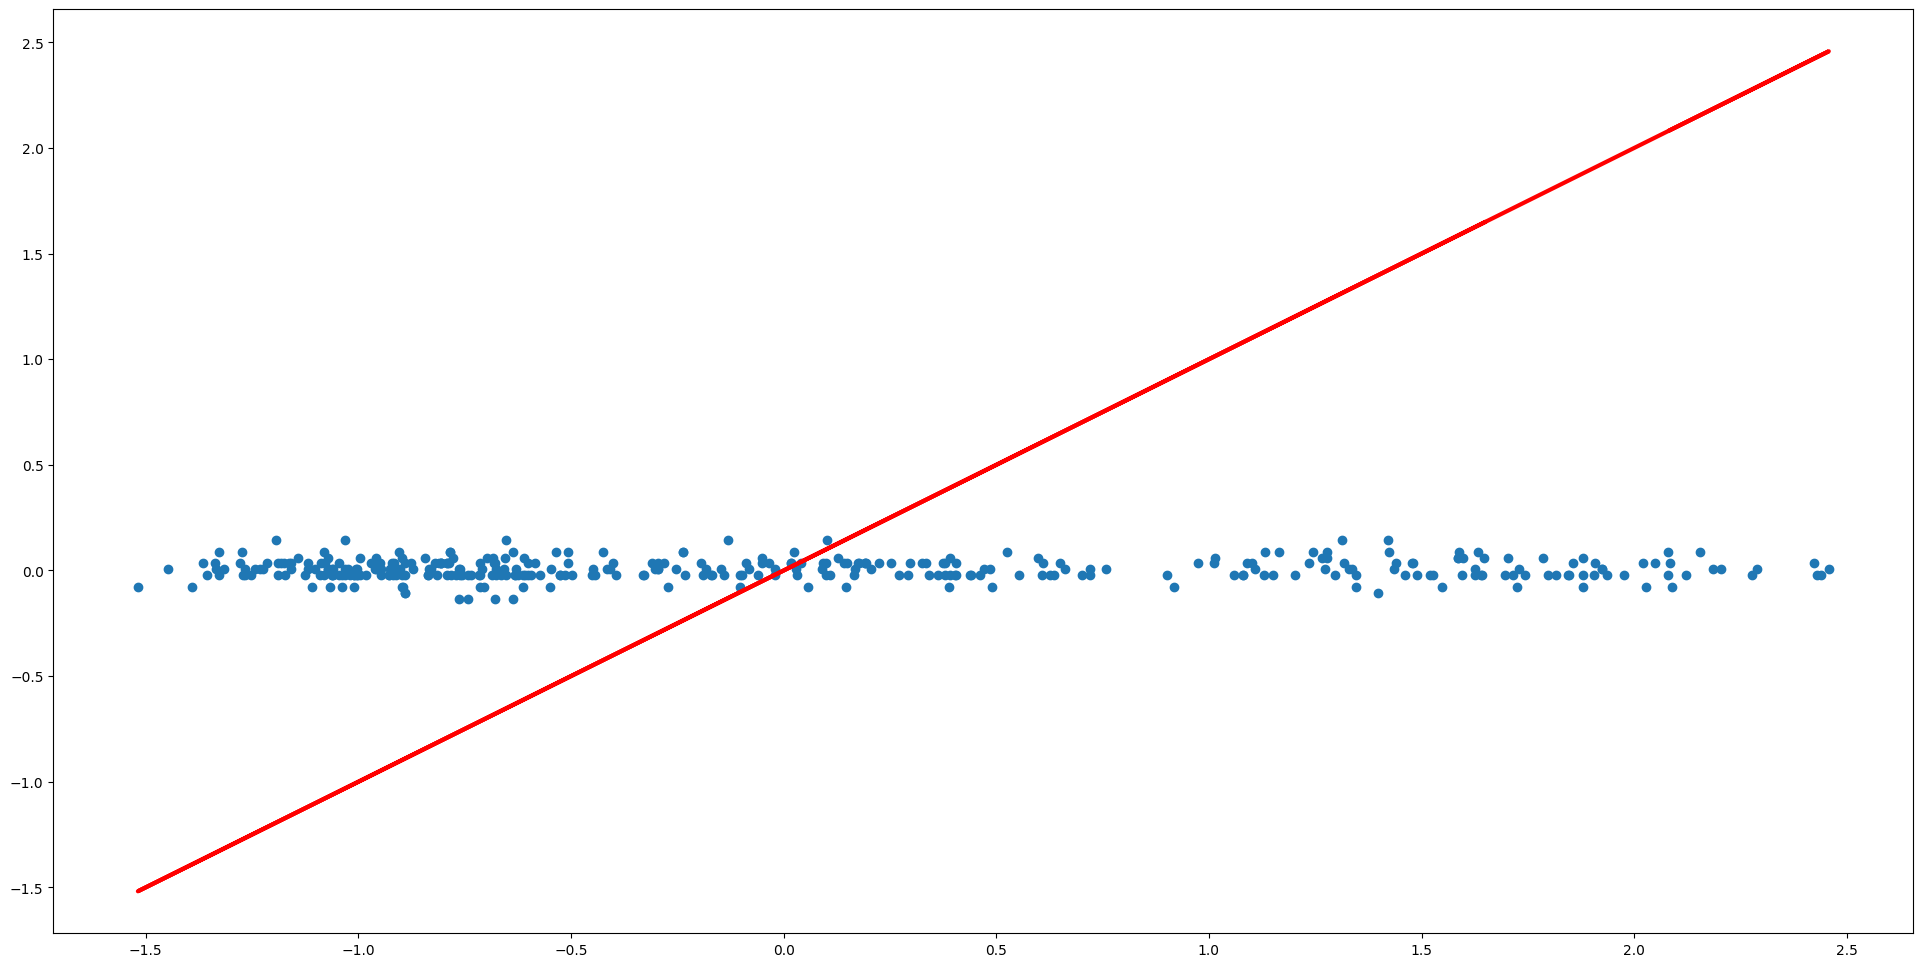

In [ ]:
sleep_duration = pd.DataFrame(ds_filled['sleep_duration']) 
regression_plot(sleep_duration, sleep_quality)

Intercept of Regression 	: b =  [0.36056957]
Coefficients of Regression 	: a =  [[-0.2061249]]



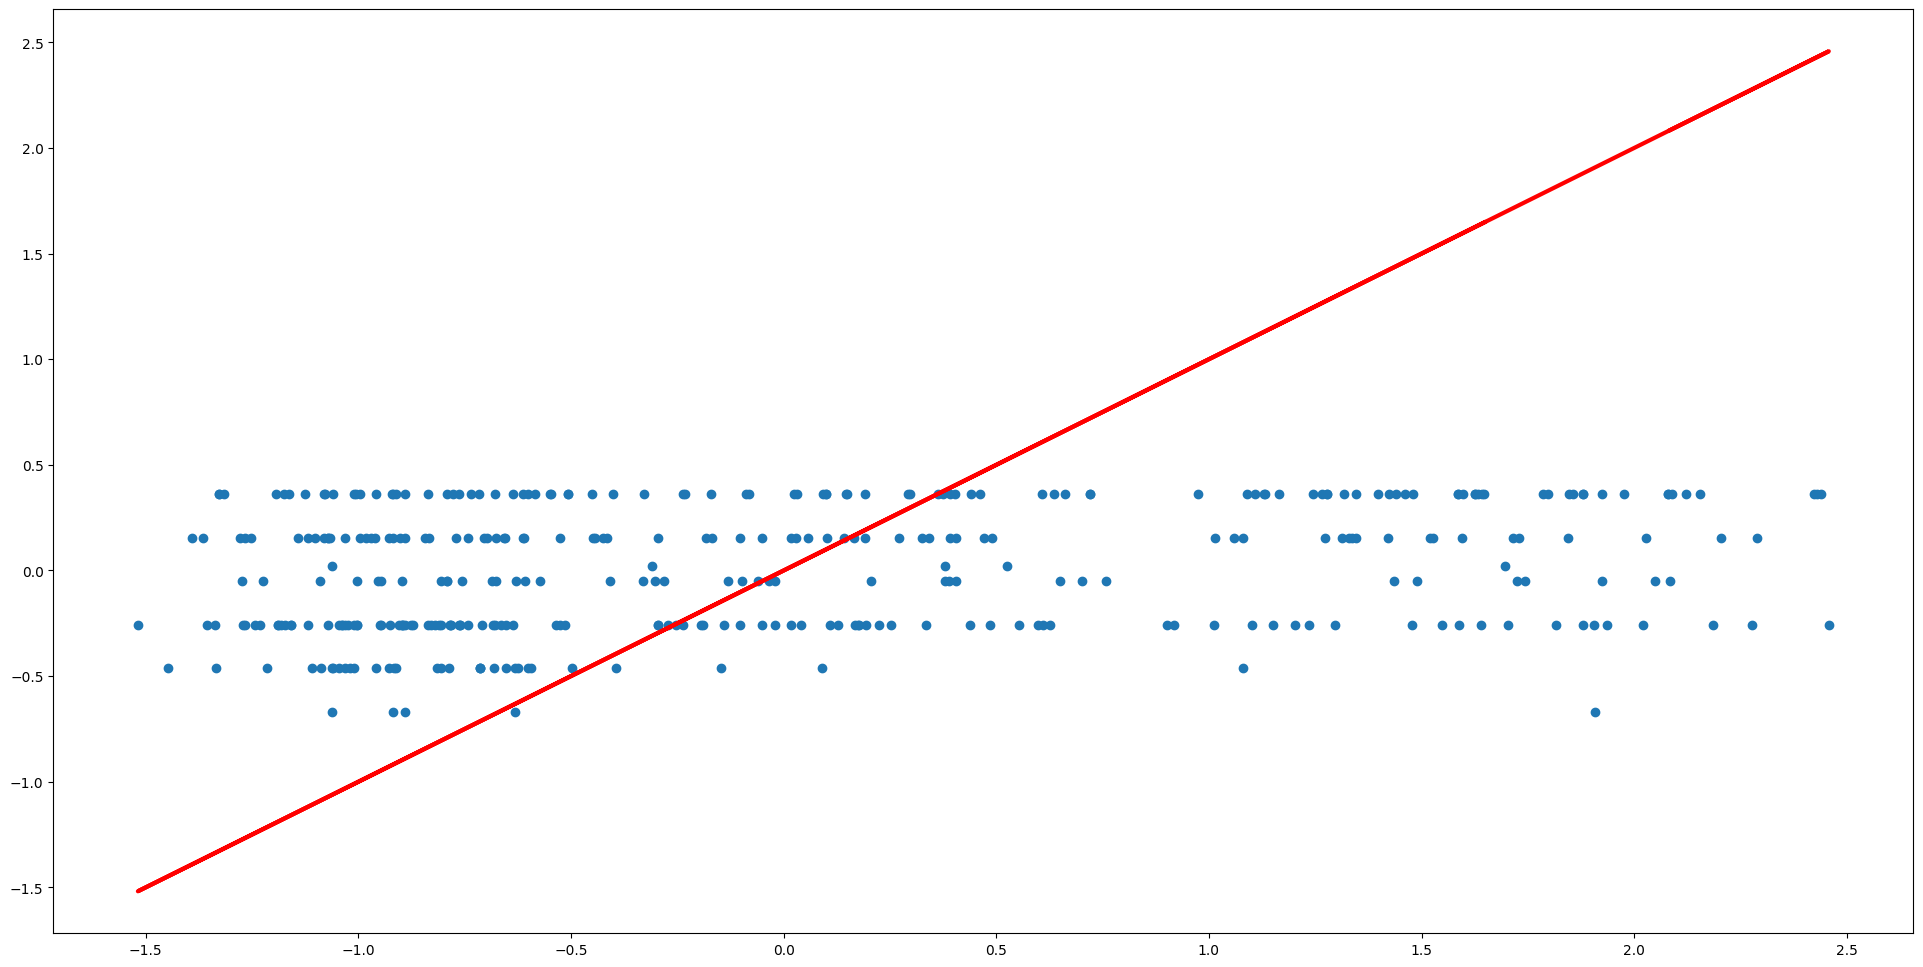

In [ ]:
exercise_frequency = pd.DataFrame(ds_filled['exercise_frequency']) 
regression_plot(exercise_frequency, sleep_quality)

Intercept of Regression 	: b =  [0.05996255]
Coefficients of Regression 	: a =  [[-0.00250434]]



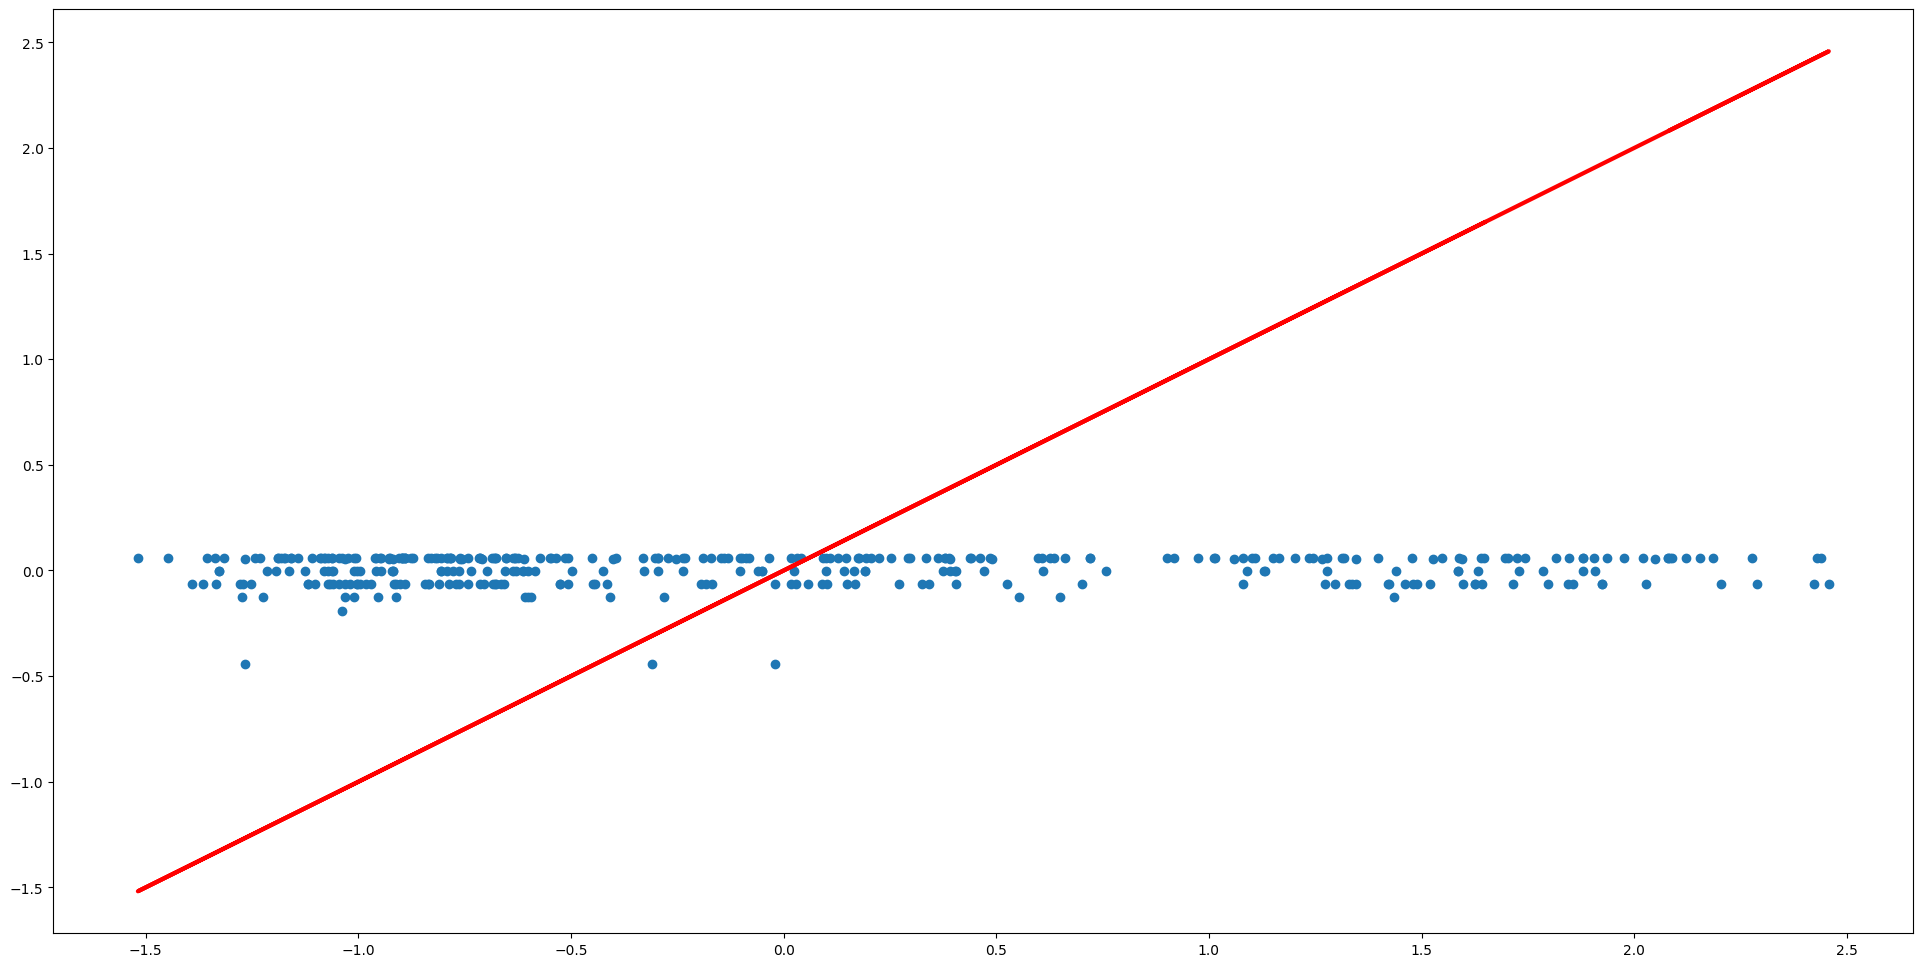

In [ ]:
caffeine_consumption = pd.DataFrame(ds_filled['caffeine_consumption']) 
regression_plot(caffeine_consumption, sleep_quality)

Intercept of Regression 	: b =  [-0.32507355]
Coefficients of Regression 	: a =  [[0.2797444]]



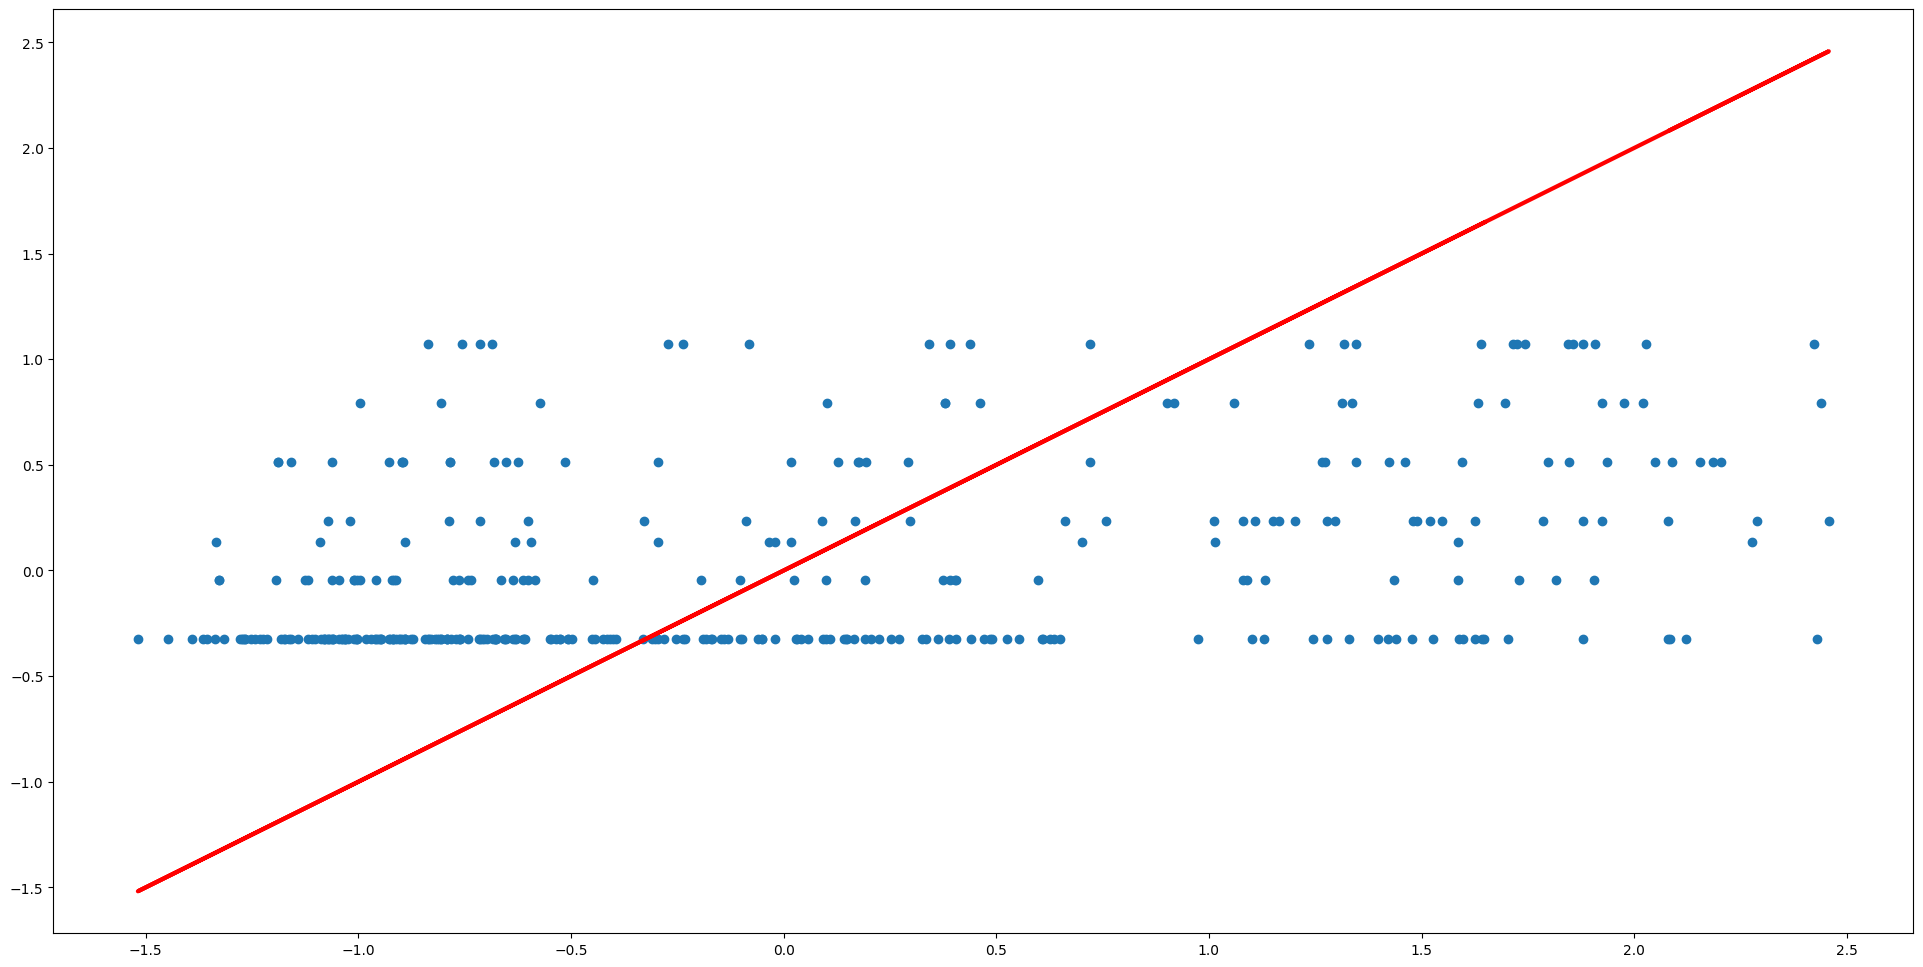

In [ ]:
alcohol_consumption = pd.DataFrame(ds_filled['alcohol_consumption']) 
regression_plot(alcohol_consumption, sleep_quality)

Intercept of Regression 	: b =  [-0.12690098]
Coefficients of Regression 	: a =  [[0.40104801]]



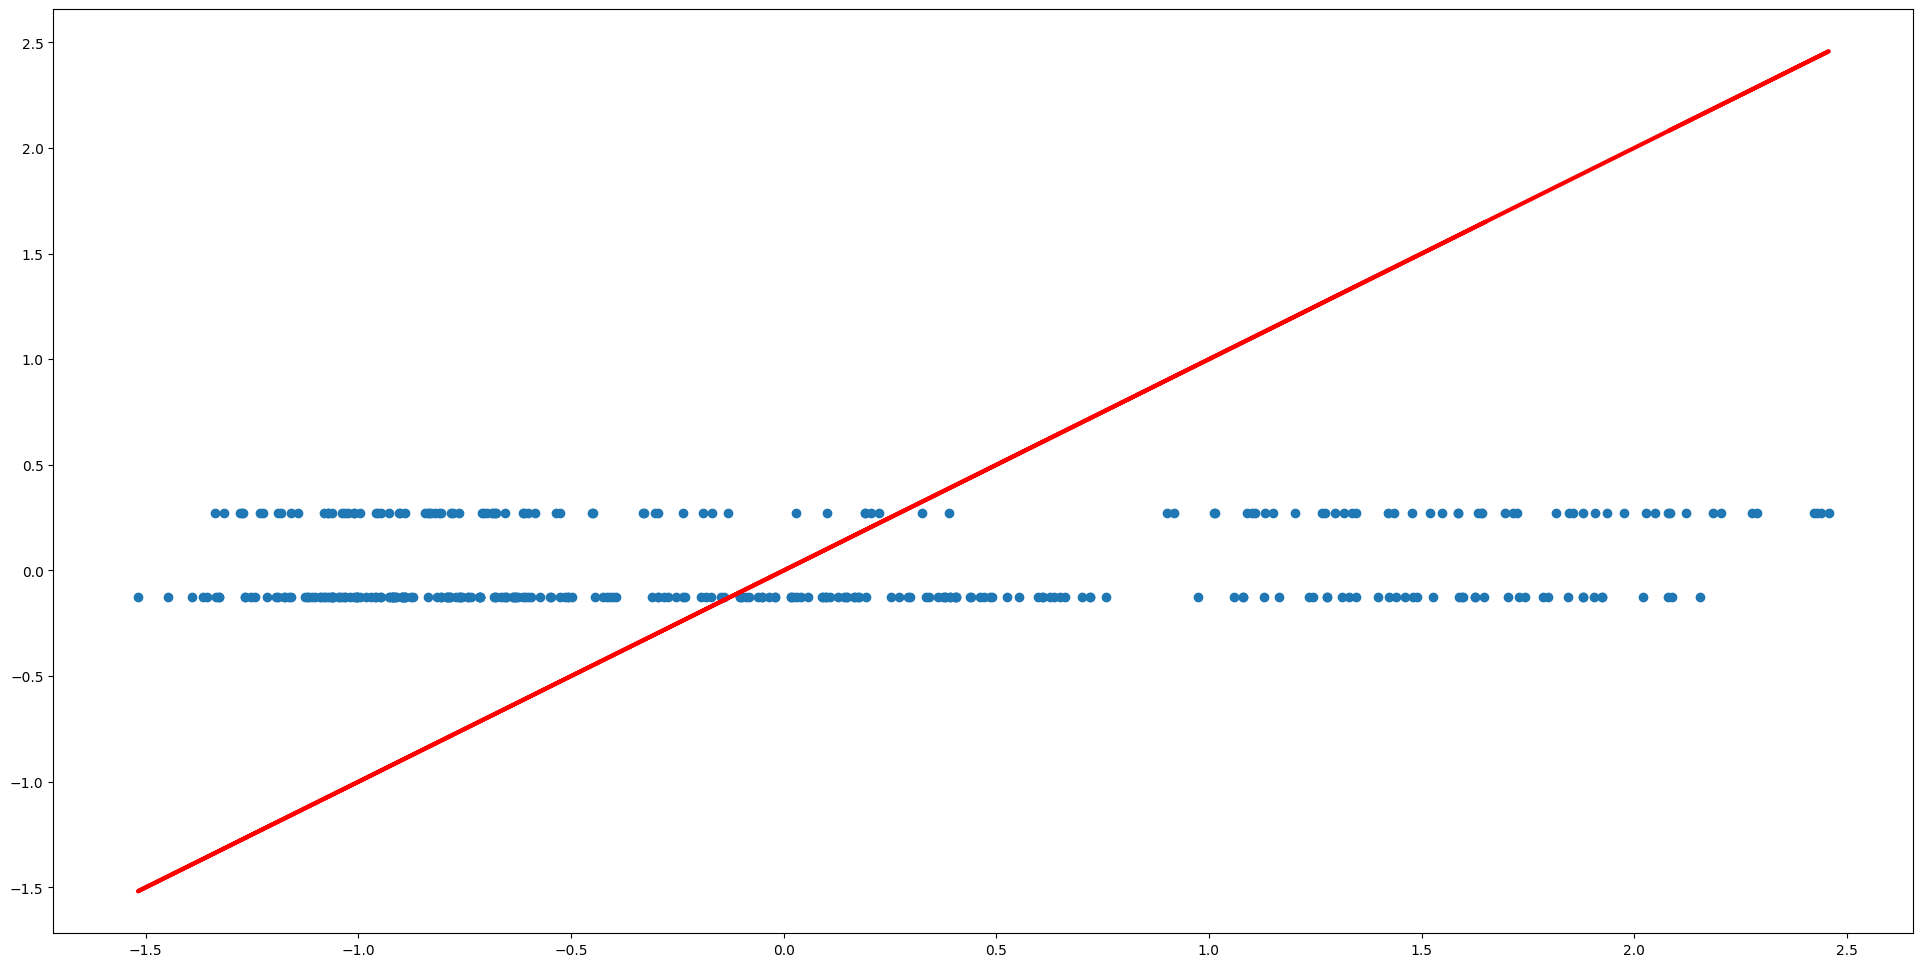

In [ ]:
smoking_status = pd.DataFrame(ds_filled['smoking']) 
regression_plot(smoking_status, sleep_quality)

### Evaluating Model

In [ ]:
# Goodness of Fit Function
def goodness_of_fit(predictor, response, explained_variance = False):
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.20,random_state=0)
    
    # Linear Regression using Train Data
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    # Predict response values corresponding to predictor
    y_test_pred = linreg.predict(X_test)
    
    # Print the predictor and response variables
    print(predictor.columns[0] + " vs " + response.columns[0])
    
    # Print explained variance 
    if explained_variance == True:
        print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    
    # Check the Goodness of Fit (on Test Data)
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print()

In [ ]:
goodness_of_fit(age, sleep_quality, explained_variance = True)
goodness_of_fit(gender, sleep_quality, explained_variance = True)
goodness_of_fit(wakeup_time, sleep_quality, explained_variance = True)
goodness_of_fit(bed_time, sleep_quality, explained_variance = True)
goodness_of_fit(sleep_duration, sleep_quality, explained_variance = True)
goodness_of_fit(exercise_frequency, sleep_quality, explained_variance = True)
goodness_of_fit(caffeine_consumption, sleep_quality, explained_variance = True)
goodness_of_fit(alcohol_consumption, sleep_quality, explained_variance = True)
goodness_of_fit(smoking_status, sleep_quality, explained_variance = True)

age vs sleep_quality
Explained Variance (R^2) 	: 0.0044160216222027815
Mean Squared Error (MSE) 	: 0.9703476149228505
Root Mean Squared Error (RMSE) 	: 0.9850622391112404

gender_type vs sleep_quality
Explained Variance (R^2) 	: 0.0009458736077059271
Mean Squared Error (MSE) 	: 0.9736477927774904
Root Mean Squared Error (RMSE) 	: 0.9867359285936083

wakeup_time_encoded vs sleep_quality
Explained Variance (R^2) 	: 0.02573001158208832
Mean Squared Error (MSE) 	: 0.9849386928389878
Root Mean Squared Error (RMSE) 	: 0.992440775481836

bed_time_encoded vs sleep_quality
Explained Variance (R^2) 	: 0.0259336838872698
Mean Squared Error (MSE) 	: 1.0171776775376902
Root Mean Squared Error (RMSE) 	: 1.0085522681238144

sleep_duration vs sleep_quality
Explained Variance (R^2) 	: 0.0020026692083499054
Mean Squared Error (MSE) 	: 0.9737179871023679
Root Mean Squared Error (RMSE) 	: 0.9867714969041049

exercise_frequency vs sleep_quality
Explained Variance (R^2) 	: 0.07608170195570785
Mean Squared E

Univariate Linear is not an effective model because...

### Make Predictions?

## Multivariate Linear Regression

### Multivariate Linear Regression based on Sleep Quality w.r.t. Lifestyle Choices (bed time, sleep duration, caffeine consumption, alcohol consumption, smoking)

### Importing Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Splitting data into Train and Test

In [ ]:
X = ds_filled[['age','gender_type','wakeup_time_encoded','bed_time_encoded','sleep_duration', 'exercise_frequency', 'caffeine_consumption', 'alcohol_consumption', 'smoking']]
y = ds_filled['sleep_quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


### Plotting the Multivariate Linear Regression Model

Intercept of Regression 	: b =  -0.20611100695540618
Coefficients of Regression 	: a =  [-0.00851778  0.09978579  0.1299983   0.02096106 -0.0745246  -0.20741404
 -0.00276259  0.2326378   0.32047726]


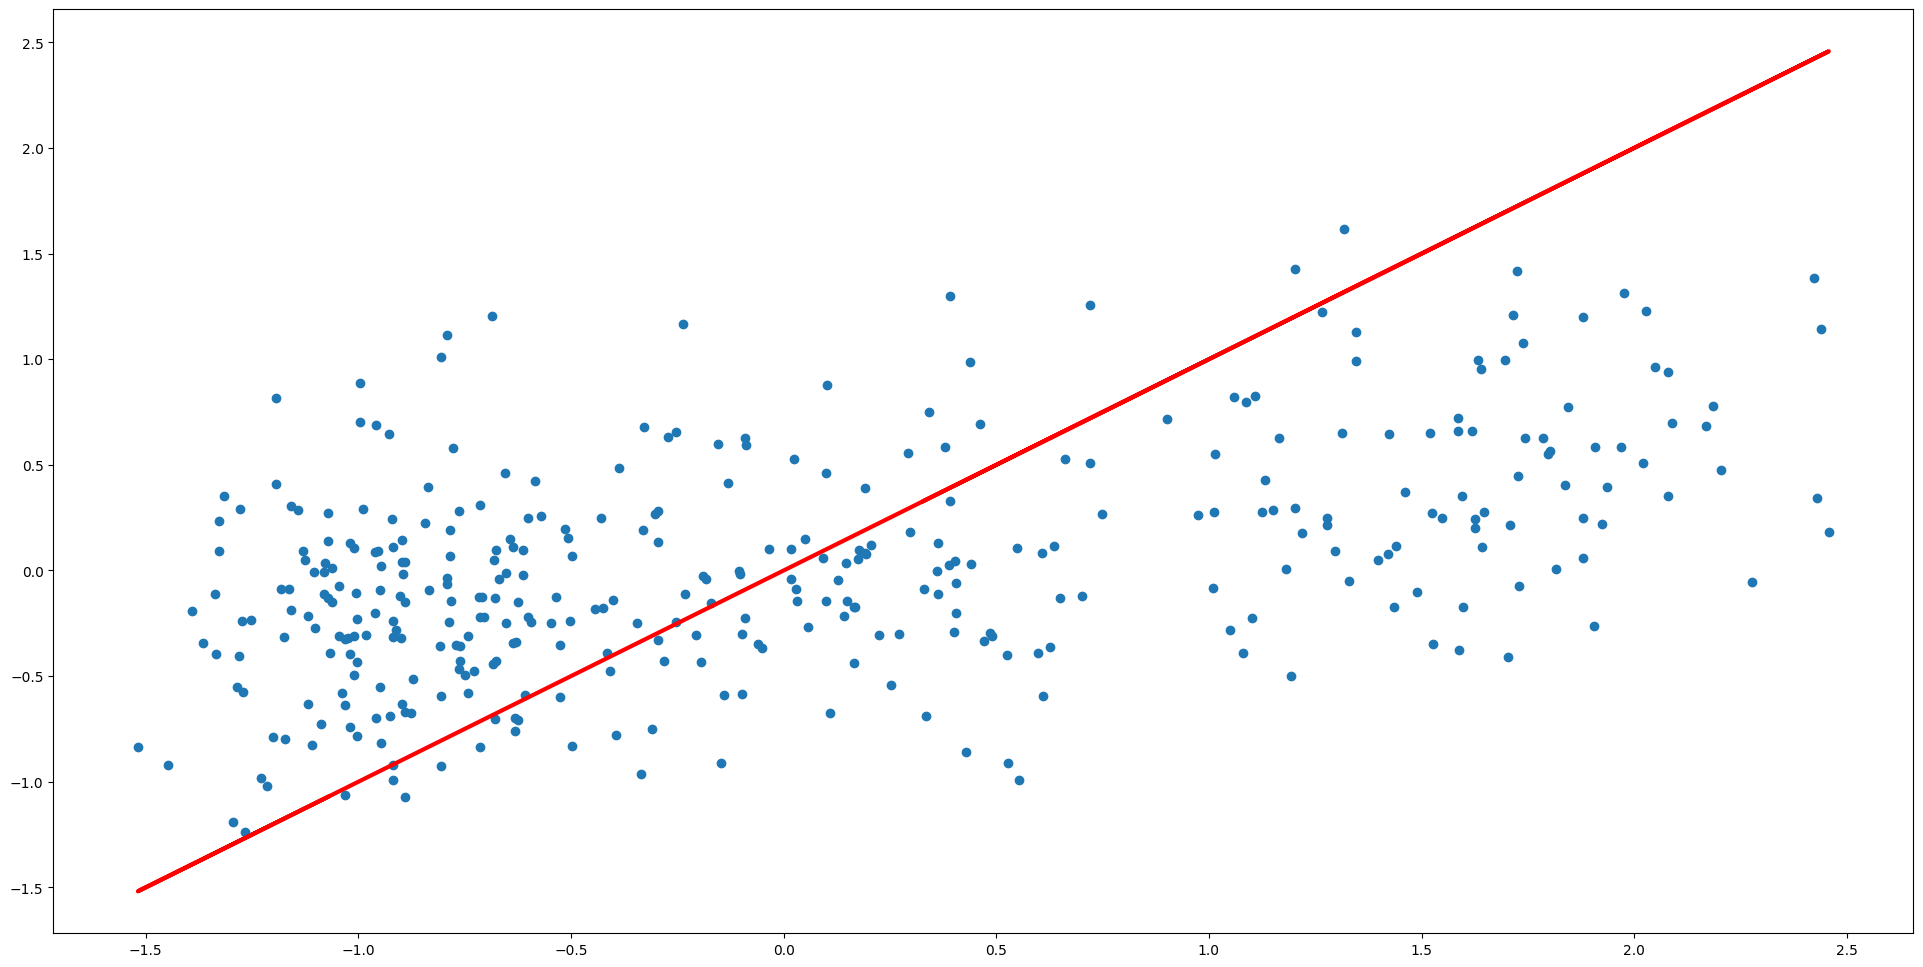

In [ ]:
# Create a LinearRegression object
linreg = LinearRegression()

# Fit the model to the training data
linreg.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

# Predict the response variable for the testing set
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the regression line
f = plt.figure(figsize=(24, 12))
plt.scatter(y_train, y_train_pred)
plt.plot(y_train, y_train, 'r-', linewidth = 3)
plt.show()

### Evaluating Model's Performance

In [ ]:
# Check the Goodness of Fit of model on the Train set
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
#Check Prediction accuracy of the model on the Test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("R-squared \t:", r2_score(y_test, y_test_pred))

Explained Variance (R^2) 	: 0.2552674232223401
Mean Squared Error (MSE) 	: 0.7677850631750406
Root Mean Squared Error (RMSE) 	: 0.8762334524400678
R-squared 	: 0.2763544507069652


r2_score (also known as the coefficient of determination) measures the proportion of variance in the response variable that is explained by the predictors in the model. It is defined as 1 minus the ratio of the residual variance to the total variance of the response variable. The r2_score ranges from -1 to 1, with higher values indicating a better fit of the model to the data. A value of 1 indicates a perfect fit, while a value of 0 indicates that the model does not explain any of the variability in the response variable.

### Making Predictions based on model?

## Random Forest Regression

### Random Forest Regression based on Sleep Quality w.r.t. lifestyle Choices (bed time, sleep duration, caffeine consumption, alcohol consumption, smoking)

### Importing Libraries

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Train Test Split

In [ ]:
# Split the data into training and testing sets
X = ds_filled[['age','gender_type','wakeup_time_encoded','bed_time_encoded','sleep_duration', 'exercise_frequency', 'caffeine_consumption', 'alcohol_consumption', 'smoking']]
y = ds_filled['sleep_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


### Create Random Forest Model

In [ ]:
# Create a random forest model with trees
rf_model = RandomForestRegressor(n_estimators=50, random_state=10)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the response variable for the testing set
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Import necessary libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
#Check Prediction accuracy of the model on the Test set
print("R-squared \t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared 	: 0.38294909017240764
Mean Squared Error (MSE) 	: 0.6546885726679813
Root Mean Squared Error (RMSE) 	: 0.809128279488476


In [1]:
pd.datset.to_csv('dataset/pca-sleep-efficiency.csv')

NameError: name 'pd' is not defined